## Adaptive sampling rounds TICA comparison

----------
#### Extras for adaptive sampling round plots

In [61]:
n_evecs = 10
wfeats = [feat_Ca]
cc2 = get_hls_palette(n_evecs)

_w_with_mongo = list(filter(lambda w: w[0] in wfeats, w_with_mongo()))

all_masters = [
    {"result": m}
    for m in sorted(
        {
            get_the_right_master(wrtica["lag"], all_models[wfeats[0]]["ltj"]["tica"])[
                "result"
            ]
            for _, _, wd in _w_with_mongo
            for wrtica in wd["workflowresults"]["tica"]
        },
        key=lambda x: x.lag,
    )
]

n_mongos = len(_w_with_mongo)
n_masters = len(all_masters)
donestamp()

  DONE LOADING DATA  


-----------------
- against similar master TICA


these results seem wrong

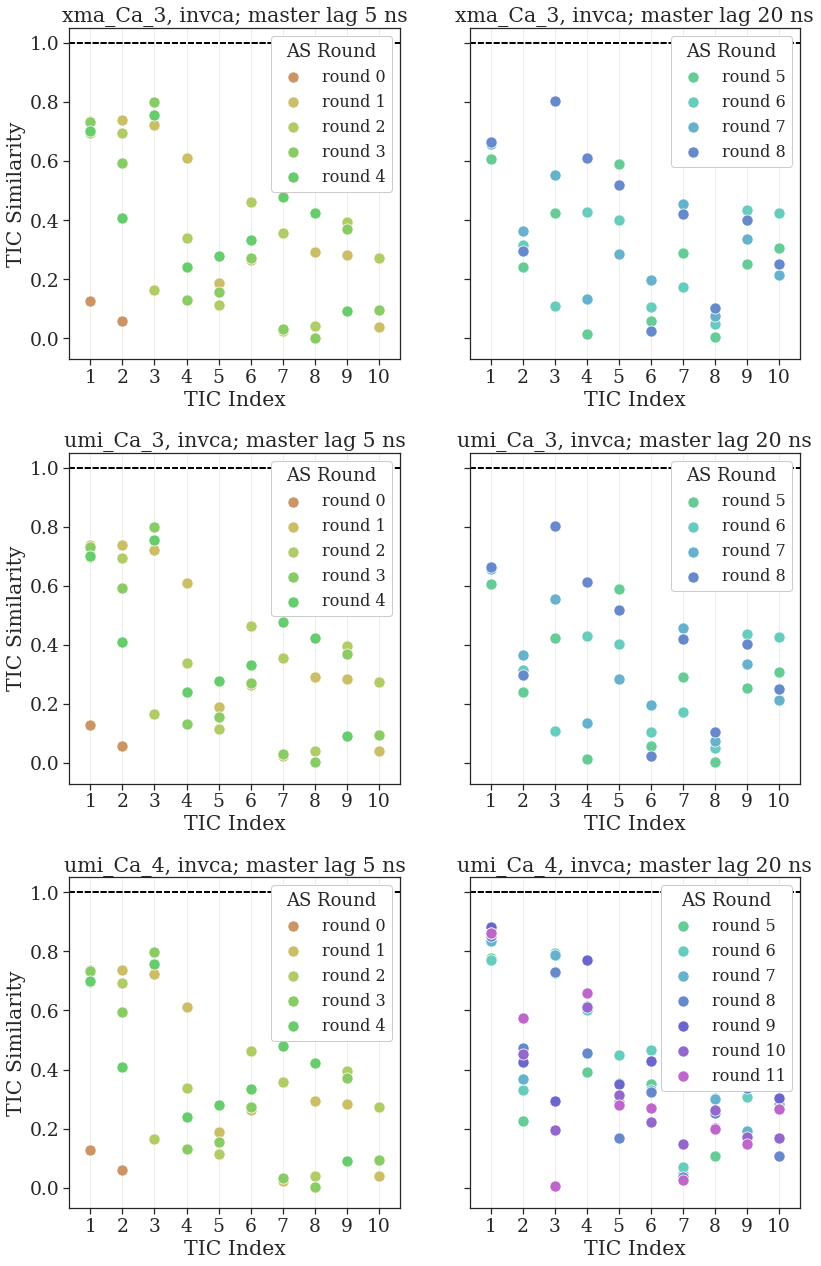

In [62]:
cc2 = get_hls_palette(15)

fig, axes = plt.subplots(
    n_mongos,
    n_masters,
    figsize=(int(6 * n_masters), int(6 * n_mongos)),
    sharey=True,
    squeeze=False,
)

for j, (f, w, d) in enumerate(_w_with_mongo):
    donethefixings = False
    donethespecialfixings = False
    for i, wrtica in enumerate(d["workflowresults"]["tica"]):
        mtica = get_the_right_master(wrtica["lag"], all_masters)
        k = all_masters.index(mtica)

        if mtica["result"].eigenvectors.shape[1] < n_evecs:
            _n_evecs = mtica["result"].eigenvectors.shape[1]
        elif wrtica["evecs"].shape[1] < n_evecs:
            _n_evecs = wrtica["evecs"].shape[1]
        else:
            _n_evecs = n_evecs

        mevecs = normalize_cols(mtica["result"].eigenvectors[:, :_n_evecs])
        evecs = normalize_cols(wrtica["evecs"][:, :_n_evecs])
        dot_by_evec = np.abs((mevecs * evecs).sum(0))

        seaborn.scatterplot(
            range(1, 1 + _n_evecs),
            dot_by_evec,
            color=cc2[i],  # cc2[1::2][j],
            s=125,
            ax=axes[j][k],
            label="round %d" % i,
        )

        if not donethefixings:
            axes[j][k].axhline(1, c="black", ls="--")
            axes[j][k].set_xlabel("TIC Index")

            axes[j][k].set_title(
                "%s, %s; master lag %d ns"
                % (w, f, mtica["result"].lag / step_per_ns[label_longtraj])
            )

            axes[j][k].set_xticks(range(1, 1 + n_evecs))
            axes[j][k].set_xticklabels(
                ["1"]
                + [
                    str(l) if (l <= 10 or l % 2 == 0) else " "
                    for l in range(2, 1 + n_evecs)
                ]
            )
            axes[j][k].grid(axis="x", alpha=0.35)
            axes[j][k].legend(
                title="AS Round", framealpha=1.0, title_fontsize=18, fontsize=16
            )

            donethefixings = False
            # donethefixings = True

        if not donethespecialfixings:
            if k == 0:
                axes[j][k].set_ylabel("TIC Similarity")
                donethespecialfixings = True


plt.tight_layout()
plt.savefig(("analyses/%s-tica_evec" "-dot_admd-rounds-vs" "-master.png" % nm), dpi=900)

-----------------
- against each master TICA


This needs to be checked more, seems not right

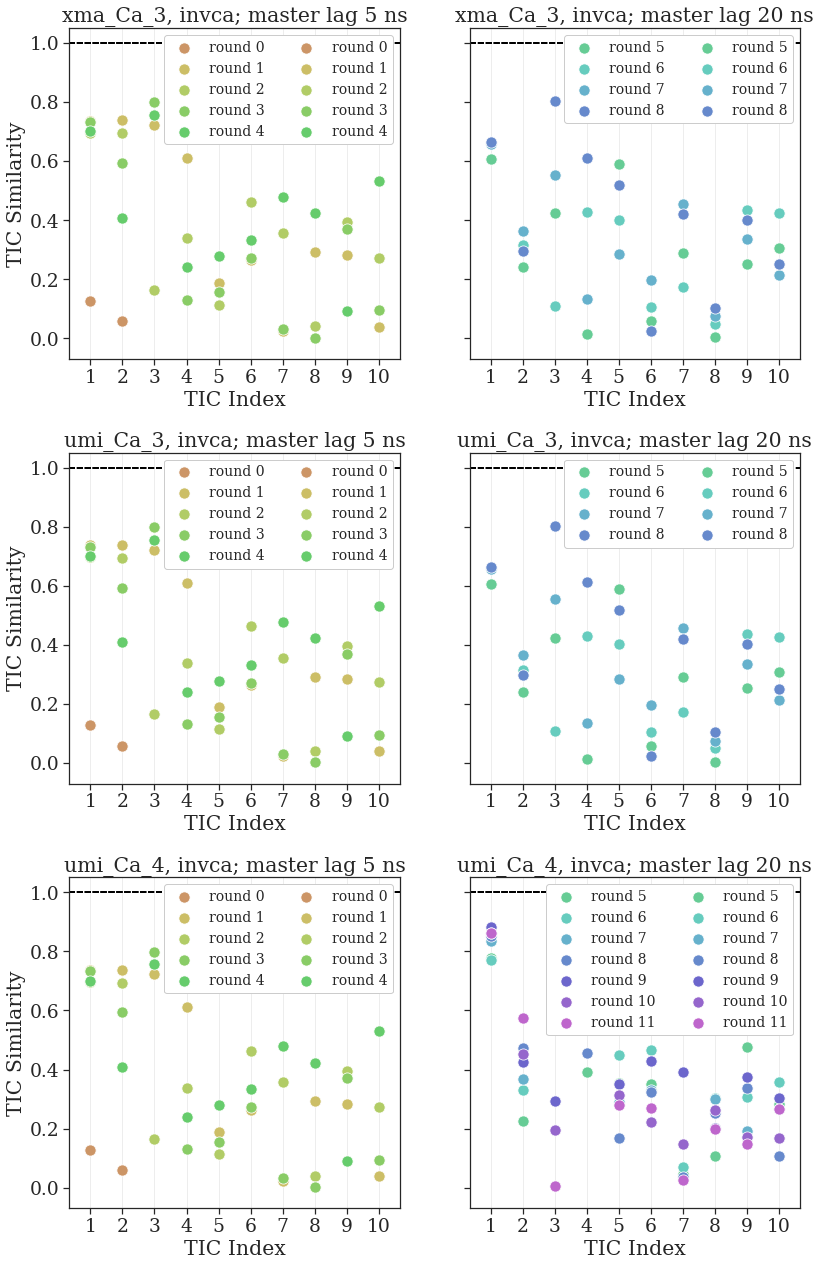

In [63]:
plt.close()

fig, axes = plt.subplots(
    n_mongos,
    n_masters,
    figsize=(int(6 * n_masters), int(6 * n_mongos)),
    sharey=True,
    squeeze=False,
)

for j, (f, w, d) in enumerate(_w_with_mongo):
    donethefixings = False
    donethespecialfixings = False
    for k, mtica in enumerate(all_masters):

        for i, wrtica in enumerate(d["workflowresults"]["tica"]):
            mtica = get_the_right_master(wrtica["lag"], all_masters)
            k = all_masters.index(mtica)

            if mtica["result"].eigenvectors.shape[1] < n_evecs:
                _n_evecs = mtica["result"].eigenvectors.shape[1]
            elif wrtica["evecs"].shape[1] < n_evecs:
                _n_evecs = wrtica["evecs"].shape[1]
            else:
                _n_evecs = n_evecs

            mevecs = normalize_cols(mtica["result"].eigenvectors[:, :_n_evecs])
            evecs = normalize_cols(wrtica["evecs"][:, :_n_evecs])

            dot_by_evec = np.abs((mevecs * evecs).sum(0))

            seaborn.scatterplot(
                range(1, 1 + _n_evecs),
                dot_by_evec,
                color=cc2[i],  # cc2[1::2][j],
                s=125,
                ax=axes[j][k],
                label="round %d" % i,
            )

            if not donethefixings:
                axes[j][k].axhline(1, c="black", ls="--")
                axes[j][k].set_xlabel("TIC Index")

                axes[j][k].set_title(
                    "%s, %s; master lag %d ns"
                    % (w, f, mtica["result"].lag / step_per_ns[label_longtraj])
                )

                axes[j][k].set_xticks(range(1, 1 + n_evecs))
                axes[j][k].set_xticklabels(
                    ["1"]
                    + [
                        str(l) if (l <= 10 or l % 2 == 0) else " "
                        for l in range(2, 1 + n_evecs)
                    ]
                )
                axes[j][k].grid(axis="x", alpha=0.35)
                axes[j][k].legend(framealpha=1.0, ncol=2, fontsize=14)

                donethefixings = False
                # donethefixings = True

            if not donethespecialfixings:
                if k == 0:
                    axes[j][k].set_ylabel("TIC Similarity")
                    donethespecialfixings = True


plt.tight_layout()
plt.savefig("analyses/%s-tica_evec-dot_admd-rounds-vs-master.png" % nm, dpi=1200)

-------------------

In [64]:
print(colorama.Back.LIGHTBLACK_EX + colorama.Fore.BLUE + "  DONE LOADING DATA  ")

  DONE LOADING DATA  


-------------------

-------------------

-------------------

-------------------

-------------------